In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [71]:
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

In [72]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [73]:

train_scaled = train_input.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1).astype('float32') / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [74]:
print(train_scaled.shape)
print(val_scaled.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [75]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-HandWriteNumber.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

histroy = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb],
                    batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 48s 31ms/step - loss: 0.1686 - accuracy: 0.9473 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 2/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0432 - val_accuracy: 0.9879
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 4/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 6/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0340 - val_accuracy: 0.9904
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 0.0420 -

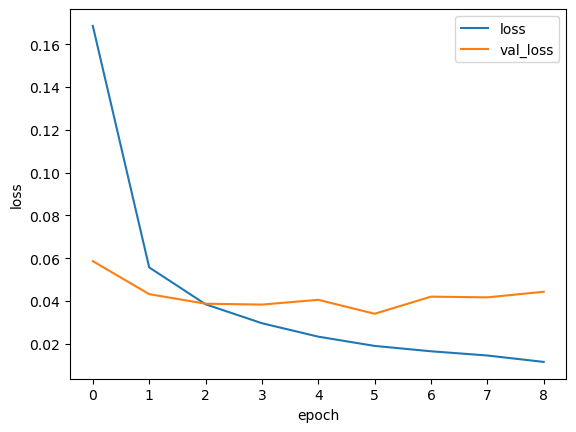

In [80]:
plt.plot(histroy.history['loss'], label="loss")
plt.plot(histroy.history['val_loss'],label="val_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [81]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.0252 - accuracy: 0.9916


[0.02518135868012905, 0.991599977016449]

In [88]:
predic = model.predict(test_scaled)
print(predic[0,:])
print(test_target[0])

313/313 [==============================] - 3s 9ms/step
[6.4876639e-11 1.2335640e-09 1.2269872e-08 1.0029594e-08 2.5455549e-10
 4.6461984e-08 6.7139021e-17 9.9999887e-01 6.7992861e-11 1.0862370e-06]
7


In [4]:
model = keras.models.load_model('best-HandWriteNumber.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open('HandWriteNumber' + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\LeeJH\AppData\Local\Temp\tmp5rn1k8vo\assets


INFO:tensorflow:Assets written to: C:\Users\LeeJH\AppData\Local\Temp\tmp5rn1k8vo\assets


342376